# Results analysis (aggregation and plots)

This notebook serves to aggregate the different metrics recorded subject to the hyperparameter settings and then present the summaries

In [17]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm

%matplotlib inline

def get_files(metrics_folder):
    all_files = list(set([os.path.join(metrics_folder, f) for f in os.listdir(metrics_folder)]))
    return all_files

def process_results2pandas(metrics_folder):
    """Creates a pandas table from the saved results dicts
    related to the input dataset name
    
    Args:
        metrics_folder (str or os.Path): path to metrics folder

    Returns:
        df (pd.DataFrame): pandas dataframe with all the different results
            and hyperparameters of interest
    """
    
    
    metric_names = ["inf_cellDensity_cellCount_correlation",
        "inf_cellproportion_sim_cellproportion_correlation",
        "cellproportion_all_jsd",
        "cellcount_all_mode_average_score",
        "cellcount_all_precision",
        "cellcount_all_recall",
        "cellcount_all_average_precision",
        "cellproportion_all_mode_average_score",
        "cellproportion_all_precision",
        "cellproportion_all_recall",
        "cellproportion_all_average_precision",
        "cellproportion_all_rmse"]
    
    df_columns = ["model_name", "num_c2l_epochs", 
           "cell_abundance_site", "nameprefix", 
           "random_seed"]
    df_columns.extend(metric_names)
    df_rows = []
    all_files = get_files(metrics_folder)
    for fpath in tqdm(all_files, "### Loading and extracting data..."):
        with open(fpath, 'rb') as handle:
            metrics = pickle.load(handle)
            f = os.path.basename(fpath)
            f = f.replace(".pkl", "")
        
            model_name, _, num_c2l_epochs, random_seed = f.split("-") 
            cell_abundance_site = metrics["cell_abundance_site"]
            nameprefix = metrics["nameprefix"]
            
        #reset_types
        model_name = model_name
        num_c2l_epochs = int(num_c2l_epochs)
        cell_abundance_site = cell_abundance_site
        nameprefix = nameprefix
        random_seed = random_seed
        
        inf_cellDensity_cellCount_correlation = metrics["inf_cellDensity_cellCount_correlation"]
        inf_cellproportion_sim_cellproportion_correlation = metrics["inf_cellproportion_sim_cellproportion_correlation"]

        cellcount_all_mode_average_score = metrics["cellcount_all_mode_average_score"]
        cellcount_all_precision = metrics["cellcount_all_precision"]
        cellcount_all_recall = metrics["cellcount_all_recall"]
        cellcount_all_average_precision = metrics["cellcount_all_average_precision"]
        cellproportion_all_mode_average_score = metrics["cellproportion_all_mode_average_score"]
        cellproportion_all_precision = metrics["cellproportion_all_precision"]
        cellproportion_all_recall = metrics["cellproportion_all_recall"]
        cellproportion_all_average_precision = metrics["cellproportion_all_average_precision"]
        cellproportion_all_jsd = metrics["cellproportion_all_jsd"]
        cellproportion_all_rmse = metrics["cellproportion_all_rmse"]
        
        metric_values = [inf_cellDensity_cellCount_correlation,
            inf_cellproportion_sim_cellproportion_correlation,
            cellproportion_all_jsd,
            cellcount_all_mode_average_score,
            cellcount_all_precision,
            cellcount_all_recall,
            cellcount_all_average_precision,
            cellproportion_all_mode_average_score,
            cellproportion_all_precision,
            cellproportion_all_recall,
            cellproportion_all_average_precision,
            cellproportion_all_rmse]
        
        row = [model_name, num_c2l_epochs, 
               cell_abundance_site, nameprefix, 
               random_seed]
        row.extend(metric_values)
        df_rows.append(row)
    
    df = pd.DataFrame(df_rows, columns=df_columns)
    return df
        

In [18]:
results_folder = 'results'
metrics_folder = os.path.join(results_folder, 'xenium', 'metrics_xenium_50res')
df = process_results2pandas(metrics_folder)
df.head()

### Loading and extracting data...: 100%|██████████| 28/28 [00:00<00:00, 64.41it/s]


,model_name,num_c2l_epochs,cell_abundance_site,nameprefix,random_seed,inf_cellDensity_cellCount_correlation,inf_cellproportion_sim_cellproportion_correlation,cellproportion_all_jsd,cellcount_all_mode_average_score,cellcount_all_precision,cellcount_all_recall,cellcount_all_average_precision,cellproportion_all_mode_average_score,cellproportion_all_precision,cellproportion_all_recall,cellproportion_all_average_precision,cellproportion_all_rmse
0,Cell2Location,25000,w_sf,cell_abundance,5,0.910,0.923,0.229762,0.895154,"{'B cells': [0.19452014436178833, 0.1944608131...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9716593183263343, 'Breast cancer...",0.856325,"{'B cells': [0.2020503404483207, 0.20198928844...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9370799667966281, 'Breast cancer...",0.095703
1,GAT_ASF_PyG_3Layer,25000,a_sf,gnn_cell_abundance,3,0.899,0.918,0.240386,0.887849,"{'B cells': [0.2087087087087087, 0.20864617086...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9690982303312794, 'Breast cancer...",0.854304,"{'B cells': [0.21141530579570925, 0.2113521735...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9339300232172814, 'Breast cancer...",0.099120
2,MLP_ASF,25000,a_sf,gnn_cell_abundance,3,0.899,0.920,0.235233,0.885603,"{'B cells': [0.19288635699678644, 0.1928274048...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.971899982788175, 'Breast cancer'...",0.855515,"{'B cells': [0.19625473731143642, 0.1961950059...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9343805610777998, 'Breast cancer...",0.097633
3,GAT_ASF_PyG,25000,a_sf,gnn_cell_abundance,2,0.902,0.920,0.237759,0.889271,"{'B cells': [0.22537975763782214, 0.2253136468...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.969955661313224, 'Breast cancer'...",0.857712,"{'B cells': [0.2022050378990889, 0.20214395099...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.934119544096149, 'Breast cancer'...",0.097840
4,GAT_ASF_PyG_2Layer,25000,a_sf,gnn_cell_abundance,1,0.900,0.918,0.240333,0.887261,"{'B cells': [0.23477642457107298, 0.2347083926...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9677120730968456, 'Breast cancer...",0.854327,"{'B cells': [0.20889029502491496, 0.2088277171...","{'B cells': [1.0, 0.9996213555471413, 0.999621...","{'B cells': 0.9319750330133797, 'Breast cancer...",0.098838


## Study hyperparameters

In [19]:
#### R
# inf_cellproportion_sim_cellproportion_correlation
#### Avg JSD
# cellproportion_all_jsd
#### AUPRC
# cellproportion_all_mode_average_score 


num_c2l_epochs = 25000
metric = "cellproportion_all_mode_average_score"

In [20]:
# Sample down
df = process_results2pandas(metrics_folder)
df = df[df['num_c2l_epochs']==num_c2l_epochs]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    model_specific_df = df[(df['model_name']==model_name)]
    print(f"\n### {model_name}")
    mean_metric = np.around(np.mean(model_specific_df[metric]), 3)
    std_metric = np.around(np.std(model_specific_df[metric]), 3)
    num_emp_samples = len(model_specific_df[metric])
    print(f"{model_name}: {metric}: {mean_metric} +- {std_metric} with {num_emp_samples} samples")

### Loading and extracting data...: 100%|██████████| 28/28 [00:00<00:00, 60.96it/s]


### Cell2Location
Cell2Location: cellproportion_all_mode_average_score: 0.858 +- 0.001 with 5 samples

### GAT_ASF_PyG
GAT_ASF_PyG: cellproportion_all_mode_average_score: 0.856 +- 0.001 with 5 samples

### GAT_ASF_PyG_2Layer
GAT_ASF_PyG_2Layer: cellproportion_all_mode_average_score: 0.855 +- 0.0 with 5 samples

### GAT_ASF_PyG_3Layer
GAT_ASF_PyG_3Layer: cellproportion_all_mode_average_score: 0.854 +- 0.0 with 5 samples

### GCNModel_ASF
GCNModel_ASF: cellproportion_all_mode_average_score: 0.856 +- 0.0 with 1 samples

### GCNModel_ASF_2Layer
GCNModel_ASF_2Layer: cellproportion_all_mode_average_score: 0.857 +- 0.0 with 1 samples

### GCNModel_ASF_3Layer
GCNModel_ASF_3Layer: cellproportion_all_mode_average_score: 0.856 +- 0.0 with 1 samples

### MLP_ASF
MLP_ASF: cellproportion_all_mode_average_score: 0.856 +- 0.0 with 5 samples


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Cell2Location'),
  Text(1, 0, 'GAT_ASF_PyG_3Layer'),
  Text(2, 0, 'MLP_ASF'),
  Text(3, 0, 'GAT_ASF_PyG'),
  Text(4, 0, 'GAT_ASF_PyG_2Layer'),
  Text(5, 0, 'GCNModel_ASF'),
  Text(6, 0, 'GCNModel_ASF_3Layer'),
  Text(7, 0, 'GCNModel_ASF_2Layer')])

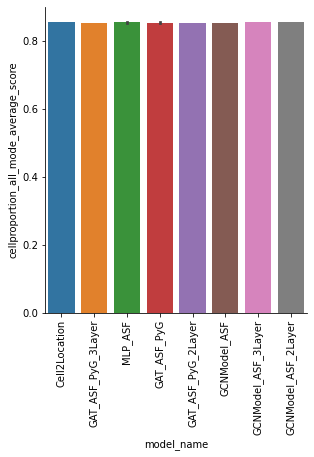

In [22]:
sns.catplot(x = "model_name", y = metric, kind="bar", data=df)
plt.xticks(rotation=90)